In [59]:
import re
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import json as js
import urllib.request, urllib.parse, urllib.error

In [60]:
page = requests.get("https://swapi.dev/api/")
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}



In [61]:
# Connecting to the web pages
people_page = requests.get("https://swapi.dev/api/people/")
planets_page = requests.get("https://swapi.dev/api/planets/")
films_page = requests.get("https://swapi.dev/api/films/")
species_page = requests.get("https://swapi.dev/api/species/")
vehicles_page = requests.get("https://swapi.dev/api/vehicles/")
starships_page = requests.get("https://swapi.dev/api/starships/")

In [62]:
# Extracting the website data
people = BeautifulSoup(people_page.content, 'html.parser')
planets = BeautifulSoup(planets_page.content, 'html.parser')
films = BeautifulSoup(films_page.content, 'html.parser')
species = BeautifulSoup(species_page.content, 'html.parser')
vehicles = BeautifulSoup(vehicles_page.content, 'html.parser')
starships = BeautifulSoup(starships_page.content, 'html.parser')

In [63]:
print(people.prettify())

{"count":82,"next":"https://swapi.dev/api/people/?page=2","previous":null,"results":[{"name":"Luke Skywalker","height":"172","mass":"77","hair_color":"blond","skin_color":"fair","eye_color":"blue","birth_year":"19BBY","gender":"male","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/6/"],"species":[],"vehicles":["https://swapi.dev/api/vehicles/14/","https://swapi.dev/api/vehicles/30/"],"starships":["https://swapi.dev/api/starships/12/","https://swapi.dev/api/starships/22/"],"created":"2014-12-09T13:50:51.644000Z","edited":"2014-12-20T21:17:56.891000Z","url":"https://swapi.dev/api/people/1/"},{"name":"C-3PO","height":"167","mass":"75","hair_color":"n/a","skin_color":"gold","eye_color":"yellow","birth_year":"112BBY","gender":"n/a","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","http

In [64]:
###############    PEOPLE   ######################
people_data = people_page.json()['results']
people_df = pd.DataFrame(people_data)
people_df.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [65]:
# The peoples data contains more entries on new webpages
next = people_page.json()['next']
len(next)

peoples = []
peoples.append(people_df)
try:
  while len(next) >0:
      next_page = requests.get(next)
      people_data_dummy = next_page.json()['results']
      dummy_df = pd.DataFrame(people_data_dummy)
      peoples.append(dummy_df)
      next = next_page.json()['next']
      dummy_df.head(3)
      print("Loading...")
except:
      print("the end!")


Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
the end!


In [66]:
peoples_df = pd.concat(peoples)
peoples_df = peoples_df.reset_index(drop=True)
peoples_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


In [67]:
###############    PLANETS   ######################
planets_data = planets_page.json()['results']
planets_df = pd.DataFrame(planets_data)
planets_df.head(3)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


In [68]:
###############    FILMS   ######################
films_data = films_page.json()['results']
films_df = pd.DataFrame(films_data)
films_df.head(3)

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/4/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/4/, https://swa...","[https://swapi.dev/api/starships/3/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/


In [69]:
###############    SPECIES   ######################
species_data = species_page.json()['results']
species_df = pd.DataFrame(species_data)
species_df.head(3)

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films,created,edited,url
0,Human,mammal,sentient,180,"caucasian, black, asian, hispanic","blonde, brown, black, red","brown, blue, green, hazel, grey, amber",120,https://swapi.dev/api/planets/9/,Galactic Basic,"[https://swapi.dev/api/people/66/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T13:52:11.567000Z,2014-12-20T21:36:42.136000Z,https://swapi.dev/api/species/1/
1,Droid,artificial,sentient,n/a,n/a,n/a,n/a,indefinite,None,n/a,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:16:16.259000Z,2014-12-20T21:36:42.139000Z,https://swapi.dev/api/species/2/
2,Wookie,mammal,sentient,210,gray,"black, brown","blue, green, yellow, brown, golden, red",400,https://swapi.dev/api/planets/14/,Shyriiwook,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:44:31.486000Z,2014-12-20T21:36:42.142000Z,https://swapi.dev/api/species/3/


In [70]:
###############    VEHICLES   ######################
vehicles_data = vehicles_page.json()['results']
vehicles_df = pd.DataFrame(vehicles_data)
vehicles_df.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[https://swapi.dev/api/films/1/],2014-12-10T16:01:52.434000Z,2014-12-20T21:30:21.665000Z,https://swapi.dev/api/vehicles/6/
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[https://swapi.dev/api/films/1/],2014-12-10T16:13:52.586000Z,2014-12-20T21:30:21.668000Z,https://swapi.dev/api/vehicles/7/


In [71]:
###############    SPACESHIPS   ######################
starships_data = starships_page.json()['results']
starships_df = pd.DataFrame(starships_data)
starships_df.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [72]:
# Let's clean up the people dataframe!
peoples_df.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [73]:
hm_links = peoples_df['homeworld'].tolist()
flm_links = peoples_df['films'].tolist()
spcs_links = peoples_df['species'].tolist()
vhcls_links = peoples_df['vehicles'].tolist()
strshps_links = peoples_df['starships'].tolist()

for i,p in peoples_df.iterrows():
  #homeworld
  hm = requests.get(hm_links[i])
  p['homeworld'] = hm.json()

  #films
  for f in flm_links[i]:
    flm = requests.get(f)
    p['films'] = p['films'] + list(flm.json().items())

  #species
  try:  
      spcs = requests.get(spcs_links[i][0])
      p['species'] = spcs.json()
  except:
      p['species'] = ""

  #vehicles
  for v in vhcls_links[i]:
    try:
      vhcl = requests.get(v)
      p['vehicles'] = vhcl.json()
    except:
      p['vehicles'] = ""

  #starships
  for s in strshps_links[i]:
    try:
      strshps = requests.get(s)
      p['starships'] = strshps.json()
    except:
      p['starships'] = ""
      
  print("Character nr {} done!".format(i+1))

Character nr 1 done!
Character nr 2 done!
Character nr 3 done!
Character nr 4 done!
Character nr 5 done!
Character nr 6 done!
Character nr 7 done!
Character nr 8 done!
Character nr 9 done!
Character nr 10 done!
Character nr 11 done!
Character nr 12 done!
Character nr 13 done!
Character nr 14 done!
Character nr 15 done!
Character nr 16 done!
Character nr 17 done!
Character nr 18 done!
Character nr 19 done!
Character nr 20 done!
Character nr 21 done!
Character nr 22 done!
Character nr 23 done!
Character nr 24 done!
Character nr 25 done!
Character nr 26 done!
Character nr 27 done!
Character nr 28 done!
Character nr 29 done!
Character nr 30 done!
Character nr 31 done!
Character nr 32 done!
Character nr 33 done!
Character nr 34 done!
Character nr 35 done!
Character nr 36 done!
Character nr 37 done!
Character nr 38 done!
Character nr 39 done!
Character nr 40 done!
Character nr 41 done!
Character nr 42 done!
Character nr 43 done!
Character nr 44 done!
Character nr 45 done!
Character nr 46 don

In [99]:
peoples_df.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,blond,age
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,26,1,23
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,26,0,116
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,34,0,37
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],"{'name': 'TIE Advanced x1', 'model': 'Twin Ion...",2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,33,0,45
4,Leia Organa,150,49,brown,light,brown,19BBY,female,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...",[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,21,0,23


### Part 3
## Make a quick descriptive analysis of your dataframe using basic pandas methods
- use at least 5 methods


In [100]:
##################### EDA ####################################
# How many characters do we have?
print("The database contains data on {} characters".format(len(peoples_df)))

The database contains data on 82 characters


In [101]:
# How many movies do we have and what are their titles?
film_names = films_df['title']
print("There are {} movies and their names are: {}".format(len(film_names), ', '.join(film_names)))

There are 6 movies and their names are: A New Hope, The Empire Strikes Back, Return of the Jedi, The Phantom Menace, Attack of the Clones, Revenge of the Sith


In [102]:
# What does our data look like?
info = peoples_df.describe()
info

,bmi,blond,age
count,82.000000,82.000000,82.000000
mean,22.634146,0.036585,47.987805
std,48.604098,0.188897,120.519707
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,22.000000,0.000000,21.000000
75%,25.000000,0.000000,56.000000
max,443.000000,1.000000,900.000000


In [103]:
# What is the shape of our data?
peoples_df.shape

(82, 19)

In [104]:
# How many entries are empty?
peoples_df.isna().sum()

name          0
height        0
mass          0
hair_color    0
skin_color    0
eye_color     0
birth_year    0
gender        0
homeworld     0
films         0
species       0
vehicles      0
starships     0
created       0
edited        0
url           0
bmi           0
blond         0
age           0
dtype: int64

In [105]:
# What are the columns of our data?
peoples_df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url', 'bmi', 'blond', 'age'],
      dtype='object')

In [106]:
type(int(peoples_df['height'][0])/100)

float

### Part 4
## Add more data using other routes - lambda functions

In [108]:
############### ADDING MORE DATA ##############################


#BMI - are alien species healthy?
peoples_df['bmi']  = [float(s['mass'].replace(",",'')) / ((float(s['height'].replace(",",''))/ 100)**2) 
                      if s['mass'] != 'unknown' and s['height'] != "unknown"
                      else 0
                      for i,s in peoples_df.iterrows() 
]
#simplify the bmi
peoples_df['bmi'] = peoples_df['bmi'].apply(lambda x: int(x))

# What if we want to find all blond characters?
peoples_df['blond'] = peoples_df['hair_color'].apply(lambda x: 1 if x == 'blond' else 0)

# How old are these characters? 
#Return of the Jedi is set in 4 ABY
peoples_df['age'] = [int(re.findall("[0-9]+", s)[0]) + 4 if s != 'unknown' else 0 for s in peoples_df['birth_year']]


peoples_df.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,blond,age
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,26,1,23
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,26,0,116
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,34,0,37


### Part 5
##Cleaning Featuring - use at least 15 pandas or numpy methods

In [109]:
# We have an idea about our data now! Let's see if it needs any cleaning

# Getting rid of unwanted columns
clean_df = peoples_df.drop(columns=['created', 'edited'])

# Replacing unknown values with the correct type
clean_df[['hair_color', 'skin_color','eye_color']] = peoples_df[['hair_color', 'skin_color','eye_color']].replace('n/a.','')

# We will keep only the ship name in the starship column. 
clean_df['starships'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['starships']]

# Same for vehicles
clean_df['vehicles'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['vehicles']]

# And homeworlds
clean_df['homeworld'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['homeworld']]

# Checking if all indexes are correct
clean_df['name'].is_unique

# Clean the birth year column
birthyears = ','.join(clean_df['birth_year']).split(",")
years = []
for b in birthyears:
  year = re.findall('\d+', b)
  if len(year)>0:
    years.append(int(year[0]))
  else:
    years.append(0)
clean_df['birth_year'] = years

# Check if all numeric columns make sense
clean_df.kurt(numeric_only=True)[:10] #No extreme skewness found

birth_year    36.775217
bmi           71.290820
blond         23.874732
age           36.170257
dtype: float64

In [110]:
# Continuation
clean_df['age'].describe()            #One character is 900 years old!!

count     82.000000
mean      47.987805
std      120.519707
min        0.000000
25%        0.000000
50%       21.000000
75%       56.000000
max      900.000000
Name: age, dtype: float64

In [111]:
super_old_dude = clean_df[clean_df['age'] == 900]['name']
super_old_dude                        # Yoda it is :D  no outliers here

18    Yoda
Name: name, dtype: object

In [112]:
# Make sure all names are capitalized properly
import string
clean_df['name'] = [string.capwords(s) for s in clean_df['name']]

In [113]:
clean_df.sample(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,bmi,blond,age
9,Obi-wan Kenobi,182,77,"auburn, white",fair,blue-gray,57,male,Stewjon,"[https://swapi.dev/api/films/1/, https://swapi...",,Tribubble bongo,Belbullab-22 starfighter,https://swapi.dev/api/people/10/,23,0,61
38,Watto,137,unknown,black,"blue, grey",yellow,0,male,Toydaria,"[https://swapi.dev/api/films/4/, https://swapi...","{'name': 'Toydarian', 'classification': 'mamma...",None,None,https://swapi.dev/api/people/40/,0,0,0
75,San Hill,191,unknown,none,grey,gold,0,male,Muunilinst,"[https://swapi.dev/api/films/5/, (title, Attac...","{'name': 'Muun', 'classification': 'mammal', '...",None,None,https://swapi.dev/api/people/77/,0,0,0


### Part 6
## Get information through aggregation / mapping / description methods


In [114]:
# What is the gender distribution of our characters?
gender = pd.DataFrame(clean_df.groupby(['gender'])['gender'].count())
gender = gender.rename(columns={'gender': 'Count'})
gender 

,Count
gender,
female,17
hermaphrodite,1
male,60
n/a,3
none,1


In [125]:
#which is the most common skin color
freq = peoples_df['skin_color'].value_counts()
print("The most common skin color is {}".format(freq.idxmax()))

The most common skin color is fair


In [115]:
# Who appears in most films?
sum = []
nr_of_appearances = [len([sum.append(1) for item in p if "title" in item]) for p in clean_df['films']]
characters = peoples_df['name']
d = {'Name':characters,'Nr of Movies':nr_of_appearances}
most_films = pd.DataFrame(d)
most_films.sort_values(by='Nr of Movies', ascending=False).head(10)

,Name,Nr of Movies
1,C-3PO,6
9,Obi-Wan Kenobi,6
2,R2-D2,6
19,Palpatine,5
18,Yoda,5
0,Luke Skywalker,4
3,Darth Vader,4
4,Leia Organa,4
12,Chewbacca,4
44,Ayla Secura,3


In [117]:
# Most Populated planets
planets = [p.get('name') for p in peoples_df['homeworld']]
d = {'Name':characters,'Home World':planets}
home_worlds = pd.DataFrame(d)
most_populated = pd.DataFrame(home_worlds['Home World'].value_counts())
most_populated.head(5)

,Home World
Naboo,11
Tatooine,10
unknown,5
Alderaan,3
Coruscant,3


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


14    Greedo
Name: name, dtype: object

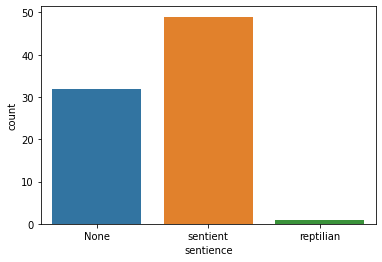

In [119]:
# I love AI and debates about consciousness so let's look more into that!
clean_df['sentience'] = [p.get('designation') if len(p)>0 else "None"  for p in peoples_df['species']]

sns.countplot(clean_df['sentience'])

# reptilians???
reptilians = clean_df[clean_df['sentience'] == "reptilian"]['name']
reptilians

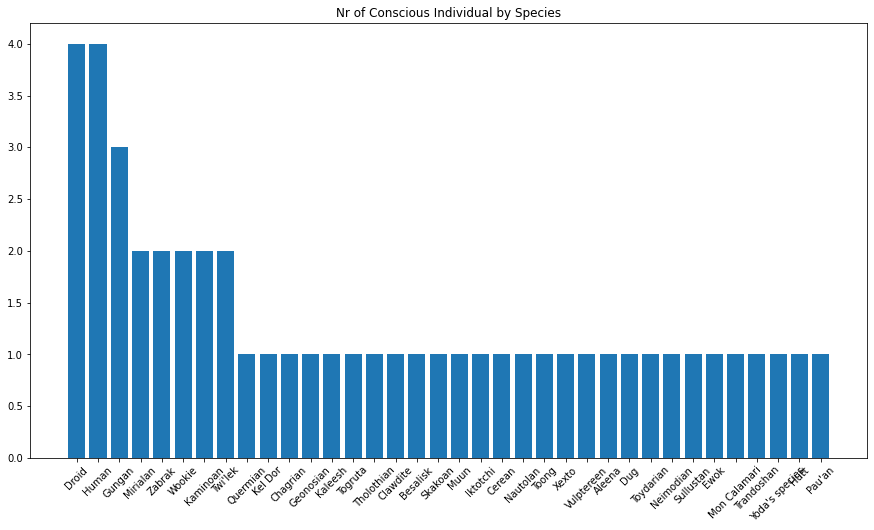

In [121]:
# What is the distribution of consciousness per species?
clean_df['species'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['species']]
clean_df['classification'] = [p.get('classification') if len(p)>0 else "None"  for p in peoples_df['species']]

#distribution = clean_df.groupby('species')["consciousness" = 'sentient'].count()
distribution = clean_df[clean_df['sentience'] == 'sentient']['species'].value_counts().to_frame().reset_index()
distribution = distribution.rename(columns={'index': 'Species', 'species': 'Conscious individuals'})

plt.figure(figsize=(15, 8))
plt.bar(distribution['Species'], distribution["Conscious individuals"])
plt.xticks(rotation = 45)
plt.title("Nr of Conscious Individual by Species")
plt.show()

# AI is taking over!!!

In [122]:
# Ok, we talked about consciousness and AI...but has any character achieved immortality? Let's see how people are doing with respect to age and life expectancy
clean_df['life expectancy'] = [p.get('average_lifespan') if len(p)>0 else "None"  for p in peoples_df['species']]
clean_df['life expectancy'].unique()
clean_df['life expectancy'] = clean_df['life expectancy'].replace(['None','unknown'],0)
clean_df['life expectancy'] = clean_df['life expectancy'].replace(['indefinite'], np.Inf)
clean_df['life expectancy'] = [float(s) for s in clean_df['life expectancy']]

clean_df['doing_well_in_life'] = np.subtract(clean_df['age'], clean_df['life expectancy'] )
clean_df['doing_well_in_life'] = pd.cut(clean_df['doing_well_in_life'],bins=[-np.Inf,0,30,100, np.Inf],labels=['Less than expected...','Still alive!','Doing Well',"Immortal!!!"])


In [123]:
# but now we added lots of uneeded punctuation to our dataframe... let's clean it up :(
clean_df['doing_well_in_life'] = clean_df['doing_well_in_life'].str.replace('\W', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [124]:
clean_df.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,vehicles,starships,url,bmi,blond,age,sentience,classification,life expectancy,doing_well_in_life
0,Luke Skywalker,172,77,blond,fair,blue,19,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,Imperial Speeder Bike,Imperial shuttle,https://swapi.dev/api/people/1/,26,1,23,None,None,0.0,Still alive
1,C-3po,167,75,n/a,gold,yellow,112,n/a,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,None,https://swapi.dev/api/people/2/,26,0,116,sentient,artificial,inf,NaN
2,R2-d2,96,32,n/a,"white, blue",red,33,n/a,Naboo,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,None,https://swapi.dev/api/people/3/,34,0,37,sentient,artificial,inf,NaN
3,Darth Vader,202,136,none,white,yellow,41,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,TIE Advanced x1,https://swapi.dev/api/people/4/,33,0,45,None,None,0.0,Doing Well
4,Leia Organa,150,49,brown,light,brown,19,female,Alderaan,"[https://swapi.dev/api/films/1/, https://swapi...",...,Imperial Speeder Bike,None,https://swapi.dev/api/people/5/,21,0,23,None,None,0.0,Still alive
